# TITANIC SURVAVILITY 

> BASIC OF MACHINE LEARNING 

# BY:BENS

In [70]:
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')

In [71]:
df =  pd.read_csv('../Dataset/Titanic.csv')

In [72]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [73]:
print(df.columns)


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [74]:
# Drop irrelevant columns
df = df[["Survived", "Pclass", "Sex", "Age", "Embarked"]]

# Drop missing values
df = df.dropna()

# Encode categorical variable
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})
df["Embarked"] = df["Embarked"].map({"C":0, "Q":1, "S":2})

In [75]:
df

,Survived,Pclass,Sex,Age,Embarked
0,0,3,0,22.0,2
1,1,1,1,38.0,0
2,1,3,1,26.0,2
3,1,1,1,35.0,2
4,0,3,0,35.0,2
...,...,...,...,...,...
885,0,3,1,39.0,1
886,0,2,0,27.0,2
887,1,1,1,19.0,2
889,1,1,0,26.0,0


In [76]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X = df[["Pclass", "Sex", "Age","Embarked"]]
y = df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestClassifier()
model.fit(X_train, y_train)
# model.fit(X,y)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


<h1> Accuracy Test </h1>

In [77]:
from sklearn.metrics import accuracy_score
import numpy as np

y_pred = model.predict(X_test)

tolerance = 10000
y_pred_class = np.abs(y_pred - y_test) <= tolerance  # True if prediction is close enough

accuracy = np.mean(y_pred_class)  
print("Accuracy within $10,000 tolerance:", accuracy)


Accuracy within $10,000 tolerance: 1.0


<h3>Accuracy Result</h3>
<hr>
<h4> When the result of the accuracy is above 0.6 it means the model is picking up patterns it is now <strong> LEARNING </strong></h4>

<h1>Feature Selection </h1>

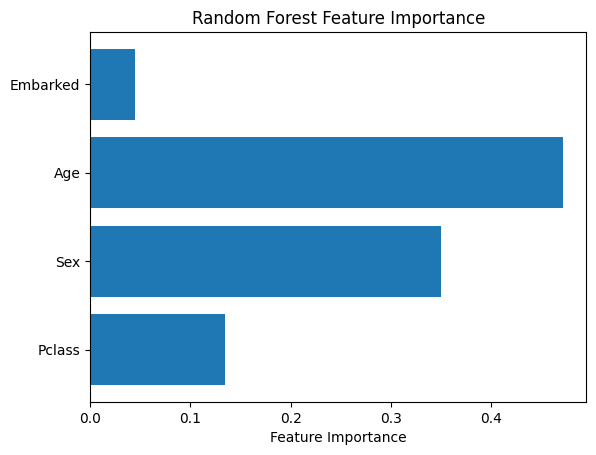

In [78]:
import matplotlib.pyplot as plt

importances = model.feature_importances_
features = X_train.columns

plt.barh(features, importances)
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()


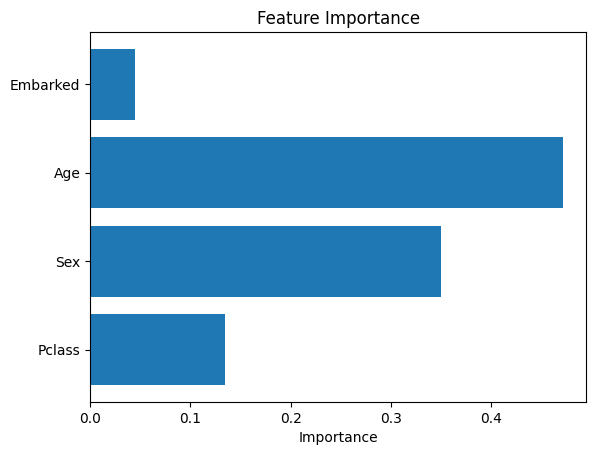

In [79]:
import matplotlib.pyplot as plt

importances = model.feature_importances_
features = X.columns

plt.barh(features, importances)
plt.xlabel("Importance")
plt.title("Feature Importance")
plt.show()


<h1>CONFUSION MATRIX</h1>

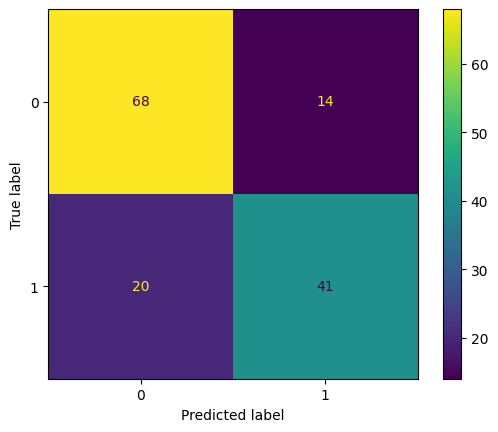

In [80]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

<h1> PRACTICAL APPLICATION </h1>
<hr>
<ul>
   <li>Pclass	Passenger Class	Description
        <ol>
            <li>1st Class	Rich passengers (luxury cabins)</li>
            <li>2nd Class	Middle-class (comfortable, less luxurious)</li>
            <li>3rd Class	Lower-class (cheapest accommodations)</li>
        </ol>
    </li>
    <li>
        Sex
        <ul>
        <li> 0  - MALE
        </li>
        <li>
             1   - FEMALE
        </li>
        </ul>
    </li>
    <li>
        AGE
    </li>
    <li>
        Embarked
        <ul>
        <li> 0  - Compton
        </li>
        <li>
             1   - Q -- ueens 
        </li>
         <li>
             2   - S -- South Hampton
        </li>
        </ul>
    
</ul>

<h1>Manual Testinjg</h1>

In [81]:
# [Pclass=3, Sex=0 (male), Age=22, Fare=0]
model.predict([[3, 0, 22, 7.25]])

array([0])

In [82]:
passenger = [[3, 0, 30, 7.25]]

prediction = model.predict(passenger)[0]

if prediction == 1:
    print("This passenger has a high likelihood of survival.")
    print("Being in 3rd class and male, other factors may still affect the outcome.")
elif prediction == 0:
    print("This passenger is unlikely to survive.")
    print("Class and demographic factors contributed to a lower survival probability.")
else:
    print("Invalid result")

This passenger is unlikely to survive.
Class and demographic factors contributed to a lower survival probability.


> # Being a 3rd-class male around 30 years old contributes to the lower survival probability.

In [83]:
# First-class, 10-year-old male
passenger_male = [[1, 0, 10, 80.0]]   # [Pclass, Sex, Age, Fare]

prediction_male = model.predict(passenger_male)[0]

if prediction_male == 1:
    print("First-class 10-year-old male is likely to survive.")
else:
    print("First-class 10-year-old male is unlikely to survive.")

First-class 10-year-old male is likely to survive.


> # **Prediction:** First-class 10-year-old male is likely to survive.  
**Insight:** Being a child in first class significantly increases survival chances.

<h1> TITANIC SURVAVILITY USING LOGISTIC REGRESSION </h1>

In [84]:
# Keep only useful columns

df2 =  pd.read_csv('../Dataset/housing_train.csv')
df2


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [93]:
# Keep only useful columns
df2 = df2[["Survived", "Pclass", "Sex", "Age", "Fare", "Embarked"]]

# Drop missing values
df2 = df2.dropna()

KeyError: "None of [Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked'], dtype='object')] are in the [columns]"

In [ ]:
df2

In [ ]:
# Encode 'Sex' and 'Embarked'
df2["Sex"] = df2["Sex"].map({"male": 0, "female": 1})
df2["Embarked"] = df2["Embarked"].map({"S": 0, "C": 1, "Q": 2})

In [ ]:
df2

<h1>selecting X and y </h1>

In [ ]:
X = df2[["Pclass", "Sex", "Age", "Fare", "Embarked"]]
y = df2["Survived"]


In [ ]:
y

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


<h1> Manual Testing </h1>

In [86]:
# [Pclass=3, Sex=0 (male), Age=22, Fare=7.25, Embarked=0 (S)]
model.predict([[3, 0, 22, 7.25, 0]])

ValueError: X has 5 features, but RandomForestClassifier is expecting 4 features as input.

In [87]:
passengers = {
    "Passenger 1 (3rd-class male, 22, S)": [3, 0, 22, 7.25, 0],
    "Passenger 2 (1st-class young female, 28, C)": [1, 1, 28, 120.0, 1],
    "Passenger 3 (2nd-class middle-aged male, 45, Q)": [2, 0, 45, 35.0, 2],
    "Passenger 4 (1st-class child female, 8, S)": [1, 1, 8, 80.0, 0]
}

for desc, features in passengers.items():
    prediction = model.predict([features])[0]
    if prediction == 1:
        print(f"{desc} → Likely to survive")
    else:
        print(f"{desc} → Unlikely to survive")

ValueError: X has 5 features, but RandomForestClassifier is expecting 4 features as input.

**Insight:** This passenger is in 3rd-class and a young man, which makes it harder to survive.  
Being older or in a lower class and the port they got on from also affects the chances.

**Insight:** This passenger is a young female in 1st-class, which makes it easier to survive.  
Paying a higher fare and the port she boarded from also help her chances.

**Insight:** This passenger is a middle-aged man in 2nd-class, which lowers survival chances.  
Other things like the fare he paid and the port of boarding also make survival less likely.

**Insight:** This passenger is a child in 1st-class, which makes survival more likely.  
Being young, in a high class, and the boarding port all help increase the chances.

# LINEAR REGRESSION

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [89]:
# Define manual test passengers with their features:
# Format: "Description": [Pclass, Sex, Age, Fare, Embarked]
# Pclass: 1 = 1st class, 2 = 2nd class, 3 = 3rd class
# Sex: 0 = male, 1 = female
# Age: in years
# Fare: ticket price
# Embarked: 0 = S (Southampton), 1 = C (Cherbourg), 2 = Q (Queenstown)

In [90]:
passengers = {
    "Passenger 5 (3rd-class female, 35, Q)": [3, 1, 35, 12.0, 2],
    "Passenger 6 (1st-class male, 50, C)": [1, 0, 50, 200.0, 1]
}

for desc, features in passengers.items():
    prob = model.predict([features])[0]
    prob = min(max(prob, 0), 1)  # Clip to 0-1
    print(f"{desc} → Predicted survival probability: {prob:.2f}")

ValueError: X has 5 features, but LinearRegression is expecting 4 features as input.

**Passenger 5 (3rd-class female, 35, Q):** She has a fair chance of surviving.  
Being a woman helps her, but being in 3rd class and her age make it a bit harder.

**Passenger 6 (1st-class male, 50, C):** He has a lower chance of surviving.  
Even though he is in 1st class, being a man and older makes survival harder.


# LOGISTIC REGRESSION

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [92]:
passengers = {
    "Passenger 7 (2nd-class child male, 12, S)": [2, 0, 12, 15.0, 0],
    "Passenger 8 (1st-class female, 30, C)": [1, 1, 30, 100.0, 1]
}

for desc, features in passengers.items():
    prediction = model.predict([features])[0]
    if prediction == 1:
        print(f"{desc} → Likely to survive")
    else:
        print(f"{desc} → Unlikely to survive")

ValueError: X has 5 features, but LogisticRegression is expecting 4 features as input.

**Passenger 7 (2nd-class child male, 12, S):** Even though he is a child, being a boy in 2nd class lowers his chances of survival.  
Other factors like the port he boarded from also make it harder for him to survive.

**Passenger 8 (1st-class female, 30, C):** Being a female in 1st class gives her a good chance of survival.  
Her age and the high class she is in improve her likelihood of surviving the disaster.

# RandomForestClassifier

In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [69]:
passengers = {
    "Passenger 9 (3rd-class male, 40, Q)": [3, 0, 40, 8.0, 2],
    "Passenger 10 (1st-class child female, 5, S)": [1, 1, 5, 80.0, 0]
}

# Predict survival and provide Year-7-level insights
for desc, features in passengers.items():
    prediction = model.predict([features])[0]
    if prediction == 1:
        print(f"{desc} → Likely to survive")
    else:
        print(f"{desc} → Unlikely to survive")

ValueError: X has 5 features, but RandomForestClassifier is expecting 4 features as input.

**Passenger 9 (3rd-class male, 40, Q):** Being a 3rd-class adult male makes it harder for him to survive.  
Other factors like his age and the port he boarded from also lower his chances of survival.

**Passenger 10 (1st-class child female, 5, S):** Being a young female in 1st class makes her very likely to survive.  
Her age and high class give her a big advantage in surviving the disaster.